## Cat Vs Dog Classification

#### 1. Import Required Libraries

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

#Images, plots, display, and visualization
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display
import cv2
from PIL import Image
import pickle
from tqdm import tqdm

import os
import math, random

import warnings

print("Tensorflow version ", tf.__version__)
print("TensorFlow Keras version ", keras.__version__)
print("OpenCV version ", cv2.__version__)

Tensorflow version  1.12.0
TensorFlow Keras version  2.1.6-tf
OpenCV version  4.0.0


In [3]:
warnings.filterwarnings('ignore')
%matplotlib inline
style.use('ggplot')

#### 2. Load the data

The images of cats and dogs can be found inside the ```images/PetImages``` folder.

In [4]:
# images dataset path
DATADIR = os.path.join(os.getcwd(), 'images', 'PetImages')

# List of categories
CATEGORIES = []
with os.scandir(DATADIR) as entries:
    for entry in entries:
        CATEGORIES.append(entry.name)

print(CATEGORIES)

['Cat', 'Dog']


Let's display some of the images from our dataset folder.

In [21]:
# create a function to display images of cats and dogs
def display_imgs(cat: bool):
    plt.figure(figsize = (15, 2))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        img = random.randint(0, 12501)
        if cat:
            img_array = cv2.imread(os.path.join(DATADIR, CATEGORIES[0], str(img)+'.jpg'))
            plt.imshow(img_array)
        else:
            img_array = cv2.imread(os.path.join(DATADIR, CATEGORIES[1], str(i)+'.jpg'))
            plt.imshow(img_array)

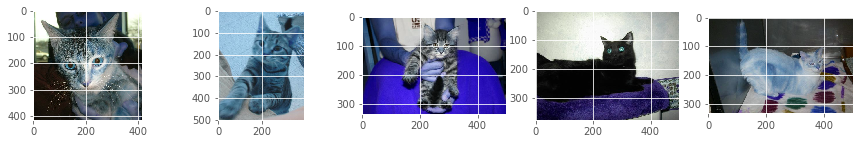

In [22]:
# display random cat images
display_imgs(cat = True)

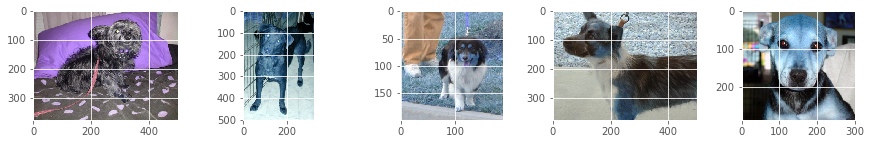

In [24]:
# display random dog images
display_imgs(cat = False)

We can see that the images are of different scale so we need to rescaled our images i.e normalized our image data.

In [39]:
data = []
input_img_x = 80
input_img_y = 80

def load_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path of each category folder
        class_num = CATEGORIES.index(category) # 0 -> cat and 1 -> dog
        
        # iterate over each image of different categories
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (input_img_x, input_img_y)) # resize the imgs
                data.append([new_array, class_num])
            except Exception as e:
                print("general exception", e, os.path.join(path, img))

load_data()

general exception OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 C:\Users\Praneet\MLCC\Day19\images\PetImages\Cat\10125.jpg
general exception OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 C:\Users\Praneet\MLCC\Day19\images\PetImages\Cat\10404.jpg
general exception OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 C:\Users\Praneet\MLCC\Day19\images\PetImages\Cat\10501.jpg
general exception OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 C:\Users\Praneet\MLCC\Day19\images\PetImages\Cat\10820.jpg
general exception OpenCV(4.0.0) C:\projects\opencv-python\opencv\mod

 C:\Users\Praneet\MLCC\Day19\images\PetImages\Dog\1866.jpg
general exception OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 C:\Users\Praneet\MLCC\Day19\images\PetImages\Dog\2384.jpg
general exception OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 C:\Users\Praneet\MLCC\Day19\images\PetImages\Dog\2688.jpg
general exception OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 C:\Users\Praneet\MLCC\Day19\images\PetImages\Dog\2877.jpg
general exception OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 C:\Users\Praneet\MLCC\Day19\images\PetImages\Dog\3136.jpg
general excep

In [40]:
len(data)

24946

In [21]:
data[23000][0].shape

(128, 128)